# FIFA 21 Dataset Cleaning Project ⚽

Project idea from the youtuber **'Data With Mo'**, [link to his video.](https://www.youtube.com/watch?v=wObV_hwu2QM&t=454s)

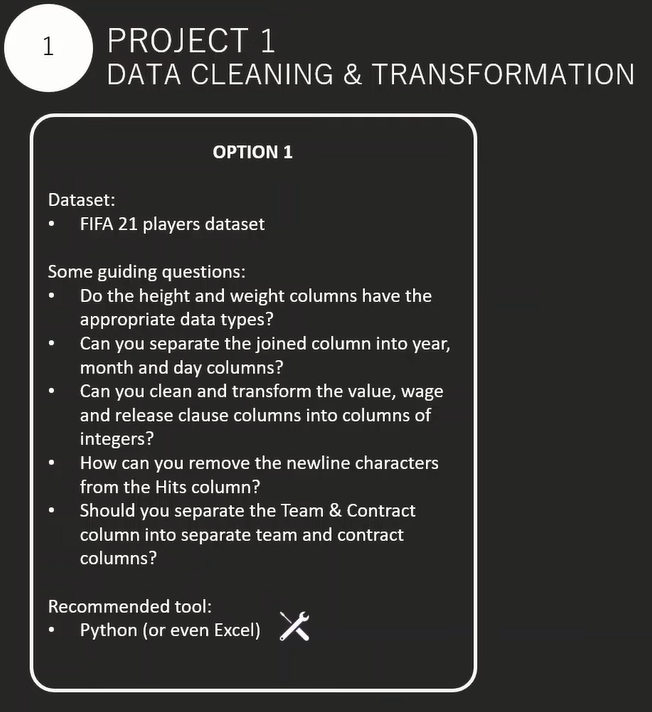

In [40]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [2]:
fifa = pd.read_csv('/home/daniel-ubuntu/Desktop/FIFA21/fifa21 raw data v2.csv')
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


## Correcting the Types of the variables 'Height' and 'Weight'.

In [3]:
#Wrong dtypes for those variables
fifa.dtypes[['Height','Weight']]

Height    object
Weight    object
dtype: object

In [4]:
# Function to convert foot and iches to cm
def height_conversor(height):
    if 'cm' in height:
        return int(height.replace('cm',''))  # removing 'cm' and transforming it in int
    elif "'" in height and '"' in height:
        parts = height.split("'")
        foot = int(parts[0]) * 30.48  # converting foot to cm
        inches = int(parts[1].replace('"', '')) * 2.54  # converting inches to cm
        return foot + inches
    else:
        return height

# Using apply with our new fuction
fifa['Height'] = fifa['Height'].apply(height_conversor)

In [5]:
# Function to convert lbs to kg
def weight_conversor(weight):
    if 'kg' in weight:
        return int(weight.replace('kg',''))  # removing 'kg' and transforming it in int
    elif "lbs" in weight:
        return int(weight.replace('lbs','')) * 0.45359237 # removing 'lbs' and converting it to kg

# Using apply with our new fuction
fifa['Weight'] = fifa['Weight'].apply(weight_conversor)

In [6]:
fifa['Weight'] = fifa['Weight'].round()
fifa['Height'] = fifa['Height'].round()

In [7]:
fifa.rename(columns={'Height':'Height (in cm)',
                     'Weight':'Weight (in kg)'}, inplace=True)
print(fifa['Height (in cm)'].dtypes)
print(fifa['Weight (in kg)'].dtypes)

float64
float64


In [8]:
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187.0,83.0,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


## Separating the 'Joined' column into three different columns (Year, Month, Day)

In [9]:
fifa.Joined = pd.to_datetime(fifa.Joined)

In [10]:
fifa['Year'] = fifa.Joined.dt.year
fifa['Month'] = fifa.Joined.dt.month
fifa['Day'] = fifa.Joined.dt.day

In [11]:
months = {1 : 'Jan',
          2: 'Feb',
          3: 'Mar',
          4: 'Apr',
          5: 'May',
          6: 'Jun',
          7: 'Jul',
          8: 'Aug',
          9: 'Sep',
          10: 'Oct',
          11: 'Nov',
          12: 'Dec',}
fifa['Month'] = fifa['Month'].map(months)

In [12]:
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,Jul,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187.0,83.0,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,Jul,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,Jul,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Aug,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,Aug,3


## Cleaning and transforming the columns 'Value', 'Wage' and 'Release Clause' into integers

In [13]:
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,Jul,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187.0,83.0,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,Jul,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,Jul,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Aug,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,Aug,3


In [14]:
# Function to convert foot and iches to cm
def money_conversor(money):
    fifa.Value.replace('€','')
    if 'M' in money:
        return float(money.replace('M','').replace('€','')) * 1000000
    else:
        return float(money.replace('K','').replace('€','')) * 1000

# Using apply with our new fuction
fifa['Value'] = fifa['Value'].apply(money_conversor)

In [15]:
# 'Value' is now clean and integers
fifa.Value = fifa.Value.astype(int)

In [16]:
# 'Wage' is now clean and integers
fifa['Wage'] = fifa['Wage'].apply(money_conversor)
fifa['Wage'] = fifa['Wage'].astype(int)

In [17]:
# 'Release Clause' is now clean and integers
fifa['Release Clause'] = fifa['Release Clause'].apply(money_conversor)
fifa['Release Clause'] = fifa['Release Clause'].astype(int)

## Removing the newlines (\n) characters from the 'Club' column

I'm using the second version of this dataset, and differently from the first version, the column with newlines characters problem is at 'Club'

In [18]:
for i in range(len(fifa['Club'])):
  fifa.Club[i] = fifa.Club[i].replace('\n\n\n\n','')

In [19]:
fifa.Club.value_counts()

Club
No Club                   237
FC Barcelona               33
Burnley                    33
RC Celta                   33
Torino                     33
                         ... 
Melbourne Victory          18
Brisbane Roar              18
Adelaide United            18
Perth Glory                18
Central Coast Mariners     18
Name: count, Length: 682, dtype: int64

**The column 'Team and Contract' is already separated**

## Some more cleaning

In [20]:
fifa.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height (in cm)',
       'Weight (in kg)', 'Preferred Foot', 'BOV', 'Best Position', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS'

In [21]:
fifa.drop(['photoUrl','playerUrl'],axis =1, inplace=True)

In [22]:
rename_columns = {'LongName':'Fullname',
                  '↓OVA':'OVA',
                  'Value':'Value (EUR)',
                  'Wage':'Wage (EUR)',
                  'Release Clause':'Release Clause (EUR)'}
fifa.rename(columns=rename_columns, inplace=True)

In [23]:
fifa = fifa[['ID', 'Name', 'Fullname','Nationality', 'Age',
       'OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height (in cm)',
       'Weight (in kg)', 'Preferred Foot', 'BOV', 'Best Position', 'Joined','Year', 'Month',
       'Day', 'Loan Date End', 'Value (EUR)', 'Wage (EUR)', 'Release Clause (EUR)', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits']]

In [24]:
fifa.head()

,ID,Name,Fullname,Nationality,Age,OVA,POT,Club,Contract,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Year,Month,Day,Loan Date End,Value (EUR),Wage (EUR),Release Clause (EUR),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,2004-07-01,2004,Jul,1,NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187.0,83.0,Right,92,ST,2018-07-10,2018,Jul,10,NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,2014-07-16,2014,Jul,16,NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,2015-08-30,2015,Aug,30,NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,2017-08-03,2017,Aug,3,NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


### Removing the '★' simbol from the dataset

In [25]:
for i in range(len(fifa['W/F'])):
  fifa['W/F'][i] = fifa['W/F'][i].replace('★','')
  fifa['SM'][i] = fifa['SM'][i].replace('★','')
  fifa['IR'][i] = fifa['IR'][i].replace('★','')

### Separating the column contract into two: 'Contract Start' and 'Contract end'

In [26]:
fifa['Contract'].value_counts()

Contract
2019 ~ 2021            1706
2020 ~ 2022            1445
2020 ~ 2021            1440
2019 ~ 2022            1236
2018 ~ 2021            1163
                       ... 
Jul 5, 2021 On Loan       1
2006 ~ 2024               1
2020 ~ 2026               1
2010 ~ 2025               1
Aug 1, 2021 On Loan       1
Name: count, Length: 131, dtype: int64

In [27]:
fifa[['Contract Start', 'Contract End']] = fifa['Contract'].str.split(' ~ ', expand=True)

In [28]:
fifa = fifa[['ID', 'Name', 'Fullname','Nationality', 'Age',
       'OVA', 'POT', 'Club', 'Contract','Contract Start', 'Contract End', 'Positions', 'Height (in cm)',
       'Weight (in kg)', 'Preferred Foot', 'BOV', 'Best Position', 'Joined','Year', 'Month',
       'Day', 'Loan Date End', 'Value (EUR)', 'Wage (EUR)', 'Release Clause (EUR)', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits']]

In [29]:
fifa[fifa['Contract End'].isna()]
#Now we have to deal with values like 'Jun 30, 2021 On Loan' and 'Free'

,ID,Name,Fullname,Nationality,Age,OVA,POT,Club,Contract,Contract Start,Contract End,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Year,Month,Day,Loan Date End,Value (EUR),Wage (EUR),Release Clause (EUR),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,Wales,30,83,83,Tottenham Hotspur,"Jun 30, 2021 On Loan","Jun 30, 2021 On Loan",None,RW,185.0,82.0,Left,83,RW,2013-09-01,2013,Sep,1,"Jun 30, 2021",35000000,200000,0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3,4,Medium,Medium,4,88,84,82,80,58,73,282
248,193105,A. Areola,Alphonse Areola,France,27,82,86,Fulham,"Jun 30, 2021 On Loan","Jun 30, 2021 On Loan",None,GK,195.0,94.0,Right,82,GK,2010-07-01,2010,Jul,1,"Jun 30, 2021",32000000,71000,0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3,1,Medium,Medium,2,85,79,80,84,55,78,94
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,Portugal,28,82,82,Paris Saint-Germain,"Jun 30, 2021 On Loan","Jun 30, 2021 On Loan",None,"CDM, CM",188.0,83.0,Right,82,CDM,2015-07-02,2015,Jul,2,"Jun 30, 2021",27000000,20000,0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3,3,Medium,High,3,66,63,72,73,80,85,285
289,230347,Welington Dano,Welington Kauê Dano Nascimento,Brazil,20,81,81,No Club,Free,Free,None,"LB, LM",178.0,69.0,Left,81,LB,2019-01-01,2019,Jan,1,NaN,0,0,0,327,82,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,228,70,77,81,60,16,15,15,7,7,2068,436,4,4,Medium,Medium,1,79,54,76,78,75,74,172
292,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,Brazil,24,81,81,No Club,Free,Free,None,"CB, CDM",181.0,82.0,Right,81,CB,2019-01-01,2019,Jan,1,NaN,0,0,0,309,40,56,83,67,63,312,60,72,58,58,64,344,68,74,61,78,63,381,74,91,76,79,61,338,86,82,58,50,62,70,246,77,85,84,73,18,12,14,11,18,2003,413,3,2,High,Medium,1,71,61,57,62,82,80,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,M. Najjar,Moudi Najjar,Australia,20,52,65,Macarthur FC,"Aug 31, 2021 On Loan","Aug 31, 2021 On Loan",None,ST,182.0,72.0,Left,54,ST,2018-02-13,2018,Feb,13,"Aug 31, 2021",190000,2000,0,215,29,55,53,48,30,195,52,30,33,28,52,308,68,66,63,48,63,277,51,69,54,54,49,203,42,11,48,46,56,48,57,23,15,19,47,12,7,13,6,9,1302,283,3,3,High,Low,1,67,51,39,53,21,52,NaN
18571,236818,A. Read,Arthur Read,England,20,51,63,Stevenage,"Jun 30, 2021 On Loan","Jun 30, 2021 On Loan",None,"CM, RW, LW",178.0,64.0,Left,55,CAM,2019-07-12,2019,Jul,12,"Jun 30, 2021",140000,5000,0,233,50,46,31,61,45,250,59,41,36,54,60,281,55,58,66,36,66,235,46,44,58,45,42,205,44,35,48,43,35,52,115,42,40,33,57,9,14,14,9,11,1376,299,4,2,Medium,Medium,1,57,45,52,59,38,48,NaN
18600,240392,Deng Yubiao,Yubiao Deng,China PR,23,51,60,Shijiazhuang Ever Bright F.C.,"Dec 31, 2020 On Loan","Dec 31, 2020 On Loan",None,CM,181.0,65.0,Right,55,CAM,2017-07-14,2017,Jul,14,"Dec 31, 2020",130000,3000,0,221,39,43,37,61,41,246,52,42,42,57,53,312,71,71,65,46,59,237,45,53,54,53,32,230,47,41,48,48,46,56,148,55,47,46,35,6,6,10,7,6,1429,318,3,2,Medium,Med

In [30]:
for i in range(len(fifa['Contract'])):
  if 'On Loan' in fifa['Contract'][i]:
    fifa['Contract End'][i] = fifa['Contract'][i].split()[-3]
    fifa['Contract'][i] = 'On Loan'
    fifa['Contract Start'][i] = 2020 #The year of this dataset
  elif fifa['Contract'][i] == 'Free':
    fifa['Contract End'][i] = 'Free' 
    fifa['Contract Start'][i] = 'Free' 

In [31]:
fifa[fifa['Contract'] == 'On Loan']

,ID,Name,Fullname,Nationality,Age,OVA,POT,Club,Contract,Contract Start,Contract End,Positions,Height (in cm),Weight (in kg),Preferred Foot,BOV,Best Position,Joined,Year,Month,Day,Loan Date End,Value (EUR),Wage (EUR),Release Clause (EUR),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,Wales,30,83,83,Tottenham Hotspur,On Loan,2020,2021,RW,185.0,82.0,Left,83,RW,2013-09-01,2013,Sep,1,"Jun 30, 2021",35000000,200000,0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3,4,Medium,Medium,4,88,84,82,80,58,73,282
248,193105,A. Areola,Alphonse Areola,France,27,82,86,Fulham,On Loan,2020,2021,GK,195.0,94.0,Right,82,GK,2010-07-01,2010,Jul,1,"Jun 30, 2021",32000000,71000,0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3,1,Medium,Medium,2,85,79,80,84,55,78,94
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,Portugal,28,82,82,Paris Saint-Germain,On Loan,2020,2021,"CDM, CM",188.0,83.0,Right,82,CDM,2015-07-02,2015,Jul,2,"Jun 30, 2021",27000000,20000,0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3,3,Medium,High,3,66,63,72,73,80,85,285
302,216409,M. Politano,Matteo Politano,Italy,26,81,81,Napoli,On Loan,2020,2021,"RM, RW, ST",171.0,67.0,Left,81,RM,2019-07-01,2019,Jul,1,"Jun 30, 2021",28000000,105000,0,350,80,76,40,79,75,399,83,79,77,76,84,423,84,82,89,81,87,329,78,51,77,41,82,324,63,38,76,77,70,79,121,63,29,29,48,11,12,6,8,11,1994,419,4,4,High,Medium,2,83,77,78,84,42,55,93
306,223959,L. Torreira,Lucas Torreira,Uruguay,24,81,85,Atlético Madrid,On Loan,2020,2021,"CDM, CM",166.0,60.0,Right,82,CDM,2018-07-12,2018,Jul,12,"Jun 30, 2021",33500000,74000,0,336,71,61,59,80,65,373,77,70,72,75,79,401,76,72,85,78,90,354,78,52,83,67,74,359,86,83,68,74,48,78,240,80,83,77,39,5,5,13,7,9,2102,448,3,3,Medium,High,2,74,67,75,79,79,74,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,M. Najjar,Moudi Najjar,Australia,20,52,65,Macarthur FC,On Loan,2020,2021,ST,182.0,72.0,Left,54,ST,2018-02-13,2018,Feb,13,"Aug 31, 2021",190000,2000,0,215,29,55,53,48,30,195,52,30,33,28,52,308,68,66,63,48,63,277,51,69,54,54,49,203,42,11,48,46,56,48,57,23,15,19,47,12,7,13,6,9,1302,283,3,3,High,Low,1,67,51,39,53,21,52,NaN
18571,236818,A. Read,Arthur Read,England,20,51,63,Stevenage,On Loan,2020,2021,"CM, RW, LW",178.0,64.0,Left,55,CAM,2019-07-12,2019,Jul,12,"Jun 30, 2021",140000,5000,0,233,50,46,31,61,45,250,59,41,36,54,60,281,55,58,66,36,66,235,46,44,58,45,42,205,44,35,48,43,35,52,115,42,40,33,57,9,14,14,9,11,1376,299,4,2,Medium,Medium,1,57,45,52,59,38,48,NaN
18600,240392,Deng Yubiao,Yubiao Deng,China PR,23,51,60,Shijiazhuang Ever Bright F.C.,On Loan,2020,2020,CM,181.0,65.0,Right,55,CAM,2017-07-14,2017,Jul,14,"Dec 31, 2020",130000,3000,0,221,39,43,37,61,41,246,52,42,42,57,53,312,71,71,65,46,59,237,45,53,54,53,32,230,47,41,48,48,46,56,148,55,47,46,35,6,6,10,7,6,1429,318,3,2,Medium,Medium,1,71,42,52,54,47,52,NaN
18622,252516,Chen Pu,Pu Chen,China PR,23,51,60,Shijiazhuang Ever Bright F.C.,On Loan,2020,2020,"CAM, LM",177.0,68.0,Right,53,CAM,2019-07-25,2019,Jul,25

### Dealing with some more Nan

In [32]:
fifa.isna().sum()
#Won't consider NaN values in 'Loan Date End' as a problem, because many player are not on a loan 

ID                          0
Name                        0
Fullname                    0
Nationality                 0
Age                         0
OVA                         0
POT                         0
Club                        0
Contract                    0
Contract Start              0
Contract End                0
Positions                   0
Height (in cm)              0
Weight (in kg)              0
Preferred Foot              0
BOV                         0
Best Position               0
Joined                      0
Year                        0
Month                       0
Day                         0
Loan Date End           17966
Value (EUR)                 0
Wage (EUR)                  0
Release Clause (EUR)        0
Attacking                   0
Crossing                    0
Finishing                   0
Heading Accuracy            0
Short Passing               0
Volleys                     0
Skill                       0
Dribbling                   0
Curve     

In [33]:
fifa['Hits'].fillna(0, inplace=True)

### Cleaning the 'Hits' column

In [34]:
fifa.Hits.head(10)

0     771
1     562
2     150
3     207
4     595
5     248
6     246
7     120
8    1.6K
9     130
Name: Hits, dtype: object

In [35]:
fifa.Hits = fifa.Hits.astype(str)

In [36]:
fifa.Hits.dtype

dtype('O')

In [37]:
# Function to convert values with 'K' and values with '.'
def convert_k_to_number(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    elif '.' in value:
        return int(float(value))
    else:
        return int(value)

# Using apply with our new fuction
fifa['Hits'] = fifa['Hits'].apply(convert_k_to_number)

### Changing some variables types

In [43]:
fifa.dtypes

ID                               int64
Name                            object
Fullname                        object
Nationality                     object
Age                              int64
OVA                              int64
POT                              int64
Club                            object
Contract                        object
Contract Start                  object
Contract End                    object
Positions                       object
Height (in cm)                 float64
Weight (in kg)                 float64
Preferred Foot                  object
BOV                              int64
Best Position                   object
Joined                  datetime64[ns]
Year                             int32
Month                           object
Day                              int32
Loan Date End                   object
Value (EUR)                      int64
Wage (EUR)                       int64
Release Clause (EUR)             int64
Attacking                

In [39]:
fifa['W/F'] = fifa['W/F'].astype(int)
fifa['SM'] = fifa['SM'].astype(int)
fifa['IR'] = fifa['IR'].astype(int)

## Saving the changes made in a new '.csv' file

In [45]:
fifa.to_csv('fifa21 cleaned data(1.0).csv')